In [46]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import pdb
from utils.utils import *
from models.data_manager import DataManager
from models.mice_data_loader import MiceDataLoader

In [47]:
PROSVD_K = 4 # no. of dims to reduce to
PROSVD_INIT_FRAME = 100 # No of initial frames used to initialize proSVD

processed_dir = '/home/sachinks/Data/processed/mouse-cshl'

data_ld = MiceDataLoader(None, processed_dir)

###
mouse_id = 'mSM49'
date = '14-Sep-2018'
cam = '2'

data_ld.init_file(mouse_id, date, cam)

video_metadata = {
    'shape': None,
    'fps': 15
}

dm = DataManager()

output_dir = '/home/sachinks/Data/output/mouse-cshl'
fig_dir = f'{output_dir}/figures'
data_dir = f'{output_dir}/{data_ld.get_filename()}'


raw_dir: None
processed_dir: /home/sachinks/Data/processed/mouse-cshl
verbose: True
raw_dir: None
processed_dir: /home/sachinks/Data/processed/mouse-cshl
verbose: True
mouse_id: mSM49
date: 14-Sep-2018
cam: 2
processed_filename: mSM49_14-Sep-2018_cam2


In [48]:
data = dm.load(data_dir, ['Q', 'ld', 'S'])
Q_full = data['Q']
ld = data['ld']
S = data['S']

T, N, _ = Q_full.shape

tx = (PROSVD_INIT_FRAME+np.arange(Q_full.shape[0]))/video_metadata['fps']

Q_diff = np.diff(Q_full, axis=0)
Q_norm_diff = np.linalg.norm(Q_diff, axis=1)
Q_norm_diff = np.insert(Q_norm_diff, 0, 0, axis=0)

mean_values = np.mean(ld, axis=0)
std_values = np.std(ld, axis=0)
ld_normalized = (ld - mean_values) / std_values

In [49]:
def plot_data(data, super_title):
    x = tx

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Flatten the axs array for easier iteration
    axs_flat = axs.flatten()

    # Loop through subplots
    for i, ax in enumerate(axs_flat):
        y = data[i]['value']
        # pdb.set_trace()
        for k in range(PROSVD_K):
            ax.plot(x, y[:, k], label=f'Basis {k+1}')
        ax.set_title(data[i]['title'])
        ax.legend()

    # Add a super title
    plt.suptitle(super_title, fontsize=16)
    plt.xlabel("Time (s)")

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.savefig(f'{fig_dir}/{super_title}.png')
    # Show the plots
    plt.show()


In [50]:
data = [
    {
        'value': Q_norm_diff,
        'title':'Magnitude of change of Q'
    },
    {
        'value': S,
        'title':'Singular values'
    },
    {
        'value': ld,
        'title':'Loadings'
    },
    {
        'value': ld_normalized,
        'title':'Loadings normalized'
    },
]

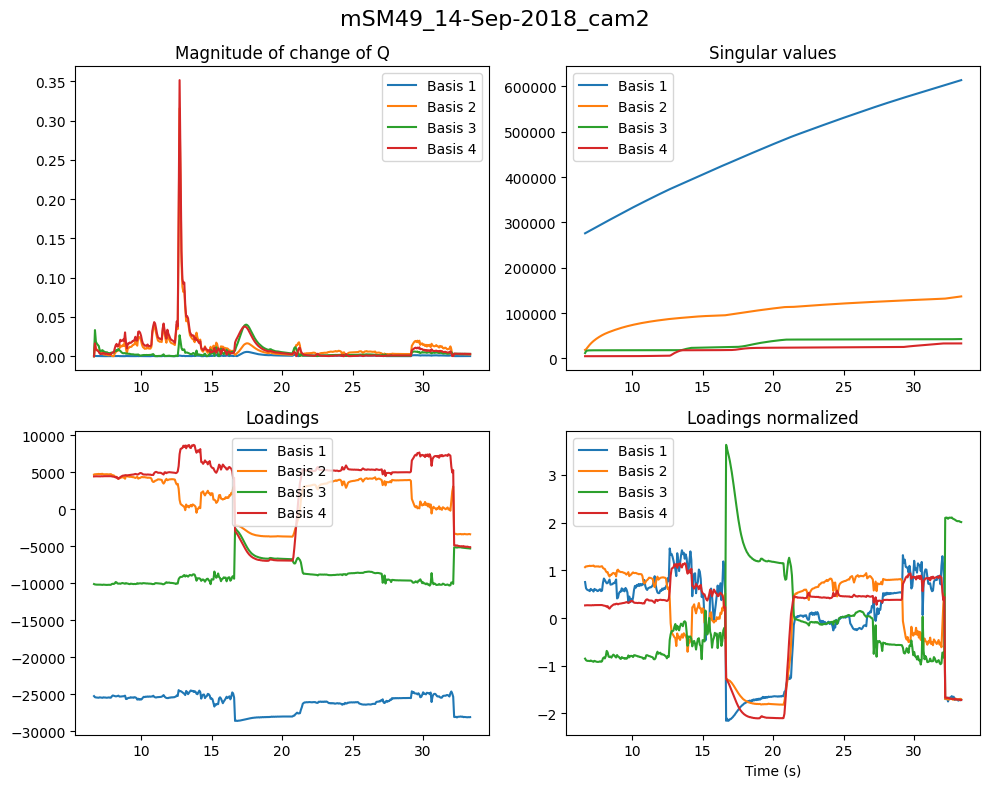

In [51]:
plot_data(data, data_ld.get_filename())

In [52]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.animation import FuncAnimation

# # Sample x and y coordinates for your trajectory
# xlim = [ld[:, 0].min(), ld[:, 0].max()]
# ylim = [ld[:, 1].min(), ld[:, 1].max()]

# start_f = 0
# end_f = ld.shape[0]
# fps = video_metadata['fps']

# x = smooth_data(ld[start_f:end_f, 0])
# y = smooth_data(ld[start_f:end_f, 1])

# # Create a function to update the plot in each frame
# def update(frame):
#     plt.clf()  # Clear the previous frame
#     plt.plot(x[:frame], y[:frame])  # Plot the trajectory up to the current frame
#     plt.xlim(xlim[0], xlim[1])  # Adjust the x-axis limits as needed
#     plt.ylim(ylim[0], ylim[1])  # Adjust the y-axis limits as needed
#     plt.xlabel('Basis 1')
#     plt.ylabel('Basis 2')
#     plt.title(f'Time: {(frame+start_f+PROSVD_INIT_FRAME)//fps}s')
#     plt.xticks([])  # Hide x ticks
#     plt.yticks([])  # Hide y ticks

# # Create an animation
# fig, ax = plt.subplots(figsize=(4, 3))  # Adjust the values as needed
# ani = FuncAnimation(fig, update, frames=len(x), repeat=False)

# # Save the animation as a GIF
# ani.save('trajectory_mice.gif', writer='pillow', fps=fps)  # Adjust the frame rate (fps) as needed
